In [80]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline        
import seaborn as sns

In [85]:
#To explore hidden columns in data frame
pd.options.display.max_columns=100

df = pd.read_csv('./test_set_values.csv')
#df_train_labels = pd.read_csv('./training_set_labels.csv') #train set labels data

In [86]:
df.set_index('id',inplace=True)
#df_train_labels.set_index('id',inplace=True)

In [147]:
#df = pd.merge(df_train_labels, df_train_set, how = 'inner', left_index = True,right_index=True) # Merge 2 data frames

In [87]:
df.reset_index(inplace=True) # Reset indexes

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [89]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [90]:
df.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [153]:
#df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

<h3><b>Scheme_management / Management / Management_group columns<b>

In [91]:
df['scheme_management'].value_counts()

VWC                 9124
WUG                 1290
Water authority      822
Water Board          714
WUA                  668
Parastatal           444
Company              280
Private operator     263
Other                230
SWC                   26
Trust                 20
Name: scheme_management, dtype: int64

In [92]:
df['management'].value_counts()

vwc                 10117
wug                  1593
water board           755
wua                   583
private operator      533
parastatal            461
other                 239
water authority       219
company               174
unknown               122
trust                  27
other - school         27
Name: management, dtype: int64

In [93]:
df['management_group'].value_counts()

user-group    13048
commercial      953
parastatal      461
other           266
unknown         122
Name: management_group, dtype: int64

In [94]:
df.loc[df['management_group']=='user-group']['management'].value_counts() 

vwc            10117
wug             1593
water board      755
wua              583
Name: management, dtype: int64

In [95]:
df.groupby(['management_group','management']).count() 

id  amount_tsh  date_recorded  funder  \
management_group management                                                   
commercial       company             174         174            174     171   
                 private operator    533         533            533     527   
                 trust                27          27             27      27   
                 water authority     219         219            219     210   
other            other               239         239            239     238   
                 other - school       27          27             27      27   
parastatal       parastatal          461         461            461     421   
unknown          unknown             122         122            122     115   
user-group       vwc               10117       10117          10117    9433   
                 water board         755         755            755     696   
                 wua                 583         583            583     534   
                 wug                1593        1593           1593    1582   

                                   gps_height  installer  longitude  latitude  \
management_group management                                                     
commercial       company                  174        171        174       174   
                 private operator         533        527        533       533   
                 trust                     27         27         27        27   
                 water authority          219        210        219       219   
other            other                    239        238        239       239   
                 other - school            27         27         27        27   
parastatal       parastatal               461        418        461       461   
unknown          unknown                  122        112        122       122   
user-group       vwc                    10117       9432      10117     10117   
                 water board              755        695        755       755   
                 wua                      583        534        583       583   
                 wug                     1593       1582       1593      1593   

                                   wpt_name  num_private  basin  subvillage  \
management_group management                                                   
commercial       company                174          174    174         174   
                 private operator       533          533    533         524   
                 trust                   27           27     27          27   
                 water authority        219          219    219         217   
other            other                  239          239    239         239   
                 other - school          27           27     27          27   
parastatal       parastatal             461          461    461         461   
unknown          unknown                122          122    122         122   
user-group       vwc                  10117        10117  10117       10029   
                 water board            755          755    755         755   
                 wua                    583          583    583         583   
                 wug                   1593         1593   1593        1593   

                                   region  region_code  district_code    lga  \
management_group management                                                    
commercial       company              174          174            174    174   
                 private operator     533          533            533    533   
                 trust                 27           27             27     27   
                 water authority      219          219            219    219   
other            other                239          239            239    239   
                 other - school        27           27             27     27   
parastatal       parastatal           461        

In [96]:
#There are 3877 null values in 'scheme_management' column.
# 'user-group' values are the grouped version of 'management'. So droped both 'management_group','scheme_management' columns
df.drop(columns=['management_group','scheme_management'],inplace=True ) 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 50785 to 68707
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             14850 non-null  float64
 1   date_recorded          14850 non-null  object 
 2   funder                 13981 non-null  object 
 3   gps_height             14850 non-null  int64  
 4   installer              13973 non-null  object 
 5   longitude              14850 non-null  float64
 6   latitude               14850 non-null  float64
 7   wpt_name               14850 non-null  object 
 8   num_private            14850 non-null  int64  
 9   basin                  14850 non-null  object 
 10  subvillage             14751 non-null  object 
 11  region                 14850 non-null  object 
 12  region_code            14850 non-null  int64  
 13  district_code          14850 non-null  int64  
 14  lga                    14850 non-null  object 
 15

<h3><b>source / source_type / source_class columns<b>

In [97]:
df['source'].value_counts()

shallow well            4316
spring                  4195
machine dbh             2747
river                   2352
rainwater harvesting     568
hand dtw                 234
lake                     185
dam                      184
other                     49
unknown                   20
Name: source, dtype: int64

In [98]:
df['source_type'].value_counts()

shallow well            4316
spring                  4195
borehole                2981
river/lake              2537
rainwater harvesting     568
dam                      184
other                     69
Name: source_type, dtype: int64

In [99]:
df['source_class'].value_counts()

groundwater    11492
surface         3289
unknown           69
Name: source_class, dtype: int64

In [100]:
df.groupby(['source_class','source_type','source']).count()

id  amount_tsh  \
source_class source_type          source                                   
groundwater  borehole             hand dtw               234         234   
                                  machine dbh           2747        2747   
             shallow well         shallow well          4316        4316   
             spring               spring                4195        4195   
surface      dam                  dam                    184         184   
             rainwater harvesting rainwater harvesting   568         568   
             river/lake           lake                   185         185   
                                  river                 2352        2352   
unknown      other                other                   49          49   
                                  unknown                 20          20   

                                                        date_recorded  funder  \
source_class source_type          source                                        
groundwater  borehole             hand dtw                        234     230   
                                  machine dbh                    2747    2564   
             shallow well         shallow well                   4316    4205   
             spring               spring                         4195    3908   
surface      dam                  dam                             184     181   
             rainwater harvesting rainwater harvesting            568     508   
             river/lake           lake                            185     183   
                                  river                          2352    2139   
unknown      other                other                            49      49   
                                  unknown                          20      14   

                                                        gps_height  installer  \
source_class source_type          source                                        
groundwater  borehole             hand dtw                     234        230   
                                  machine dbh                 2747       2561   
             shallow well         shallow well                4316       4204   
             spring               spring                      4195       3908   
surface      dam                  dam                          184        182   
             rainwater harvesting rainwater harvesting         568        504   
             river/lake           lake                         185        183   
                                  river                       2352       2139   
unknown      other                other                         49         49   
                                  unknown                       20         13   

                                                        longitude  latitude  \
source_class source_type          source                                      
groundwater  borehole             hand dtw                    234       234   
                                  machine dbh                2747      2747   
             shallow well         shallow well               4316      4316   
             spring               spring                     4195      4195   
surface      dam                  dam                         184       184   
             rainwater harvesting rainwater harvesting        568       568   
             river/lake           lake                        185       185   
                                  river                      2352      2352   
unknown      other                other                        49        49   
                                  unknown                      20        20   

                                                        wpt_name  num_private  \
source_class source_type          source                                        
groundwater  borehole             hand dtw                   234          234   
       

In [101]:
#These columns keep same information. But 'source' have more detailed information.
df.drop(columns=['source_class','source_type'],inplace=True ) 

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

<h4>quantity / quantity_group columns

In [103]:
df['quantity'].value_counts()

enough          8336
insufficient    3767
dry             1536
seasonal        1025
unknown          186
Name: quantity, dtype: int64

In [104]:
df['quantity_group'].value_counts()

enough          8336
insufficient    3767
dry             1536
seasonal        1025
unknown          186
Name: quantity_group, dtype: int64

In [105]:
#Both 'quantity' and 'quantity_group' have same values. So drop one
df.drop(columns=['quantity_group'],inplace=True) 

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

<h4>water_quality / quality_group columns

In [107]:
df['water_quality'].value_counts()

soft                  12687
salty                  1226
unknown                 469
milky                   201
coloured                133
salty abandoned          84
fluoride                 44
fluoride abandoned        6
Name: water_quality, dtype: int64

In [108]:
df['quality_group'].value_counts()

good        12687
salty        1310
unknown       469
milky         201
colored       133
fluoride       50
Name: quality_group, dtype: int64

In [109]:
df.groupby(['quality_group','water_quality']).count()

id  amount_tsh  date_recorded  funder  \
quality_group water_quality                                                  
colored       coloured              133         133            133     110   
fluoride      fluoride               44          44             44      43   
              fluoride abandoned      6           6              6       6   
good          soft                12687       12687          12687   11999   
milky         milky                 201         201            201     199   
salty         salty                1226        1226           1226    1203   
              salty abandoned        84          84             84      81   
unknown       unknown               469         469            469     340   

                                  gps_height  installer  longitude  latitude  \
quality_group water_quality                                                    
colored       coloured                   133        110        133       133   
fluoride      fluoride                    44         42         44        44   
              fluoride abandoned           6          6          6         6   
good          soft                     12687      11997      12687     12687   
milky         milky                      201        197        201       201   
salty         salty                     1226       1202       1226      1226   
              salty abandoned             84         81         84        84   
unknown       unknown                    469        338        469       469   

                                  wpt_name  num_private  basin  subvillage  \
quality_group water_quality                                                  
colored       coloured                 133          133    133         133   
fluoride      fluoride                  44           44     44          44   
              fluoride abandoned         6            6      6           6   
good          soft                   12687        12687  12687       12648   
milky         milky                    201          201    201         201   
salty         salty                   1226         1226   1226        1166   
              salty abandoned           84           84     84          84   
unknown       unknown                  469          469    469         469   

                                  region  region_code  district_code    lga  \
quality_group water_quality                                                   
colored       coloured               133          133            133    133   
fluoride      fluoride                44           44             44     44   
              fluoride abandoned       6            6              6      6   
good          soft                 12687        12687          12687  12687   
milky         milky                  201          201            201    201   
salty         salty                 1226         1226           1226   1226   
              salty abandoned         84           84             84     84   
unknown       unknown                469          469            469    469   

                                   ward  population  public_meeting  \
quality_group water_quality                                           
colored       coloured              133         133             132   
fluoride      fluoride               44          44              44   
              fluoride abandoned      6           6               6   
good          soft                12687       12687           12096   
milky         milky                 201         201             188   
salty         salty                1226        1226            1124   
              salty abandoned        84          84              65   
unknown       unknown               469         469             374   

                                  recorded_by  scheme_name  permit  \
quality_group water_quality                                          
colored       coloured          

In [110]:
# 'water_quality' column has more unique values. Therefore drop 'quality_group'
df.drop(columns=['quality_group'],inplace=True) 

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [112]:
df['waterpoint_type'].value_counts()

communal standpipe             7106
hand pump                      4396
other                          1630
communal standpipe multiple    1508
improved spring                 175
cattle trough                    34
dam                               1
Name: waterpoint_type, dtype: int64

In [113]:
df['waterpoint_type_group'].value_counts()

communal standpipe    8614
hand pump             4396
other                 1630
improved spring        175
cattle trough           34
dam                      1
Name: waterpoint_type_group, dtype: int64

In [114]:
df.groupby(['waterpoint_type_group','waterpoint_type']).count()

id  amount_tsh  \
waterpoint_type_group waterpoint_type                                 
cattle trough         cattle trough                  34          34   
communal standpipe    communal standpipe           7106        7106   
                      communal standpipe multiple  1508        1508   
dam                   dam                             1           1   
hand pump             hand pump                    4396        4396   
improved spring       improved spring               175         175   
other                 other                        1630        1630   

                                                   date_recorded  funder  \
waterpoint_type_group waterpoint_type                                      
cattle trough         cattle trough                           34      33   
communal standpipe    communal standpipe                    7106    6436   
                      communal standpipe multiple           1508    1498   
dam                   dam                                      1       1   
hand pump             hand pump                             4396    4297   
improved spring       improved spring                        175     165   
other                 other                                 1630    1551   

                                                   gps_height  installer  \
waterpoint_type_group waterpoint_type                                      
cattle trough         cattle trough                        34         34   
communal standpipe    communal standpipe                 7106       6432   
                      communal standpipe multiple        1508       1496   
dam                   dam                                   1          1   
hand pump             hand pump                          4396       4296   
improved spring       improved spring                     175        166   
other                 other                              1630       1548   

                                                   longitude  latitude  \
waterpoint_type_group waterpoint_type                                    
cattle trough         cattle trough                       34        34   
communal standpipe    communal standpipe                7106      7106   
                      communal standpipe multiple       1508      1508   
dam                   dam                                  1         1   
hand pump             hand pump                         4396      4396   
improved spring       improved spring                    175       175   
other                 other                             1630      1630   

                                                   wpt_name  num_private  \
waterpoint_type_group waterpoint_type                                      
cattle trough         cattle trough                      34           34   
communal standpipe    communal standpipe               7106         7106   
                      communal standpipe multiple      1508         1508   
dam                   dam                                 1            1   
hand pump             hand pump                        4396         4396   
improved spring       improved spring                   175          175   
other                 other                            1630         1630   

                                                   basin  subvillage  region  \
waterpoint_type_group waterpoint_type                                          
cattle trough         cattle trough                   34          34      34   
communal standpipe    communal standpipe            7106        7073    7106   
                      communal standpipe multiple   1508        1446    1508   
dam                   dam                              1           1       1   
hand pump             hand pump                     4396        4396    4396   
improved spring       improved spring                175         175     175   
other                 other                        

In [115]:
df.drop(columns=['waterpoint_type_group'],inplace=True)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [117]:
df['payment'].value_counts()

never pay                6364
pay per bucket           2281
pay monthly              2097
unknown                  1992
pay when scheme fails     928
pay annually              928
other                     260
Name: payment, dtype: int64

In [118]:
df['payment_type'].value_counts()

never pay     6364
per bucket    2281
monthly       2097
unknown       1992
on failure     928
annually       928
other          260
Name: payment_type, dtype: int64

In [119]:
df.drop(columns=['payment_type'],inplace=True)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

<h4>Extraction_type / extraction_type_group / extraction_type_class columns

In [121]:
df['extraction_type'].value_counts()

gravity              6483
nira/tanira          2051
other                1672
submersible          1218
swn 80                918
mono                  763
india mark ii         629
afridev               438
ksb                   375
other - rope pump     121
other - swn 81         55
india mark iii         37
windmill               35
cemo                   18
other - play pump      16
walimi                 12
climax                  9
Name: extraction_type, dtype: int64

In [122]:
df['extraction_type_group'].value_counts()

gravity            6483
nira/tanira        2051
other              1672
submersible        1593
swn 80              918
mono                763
india mark ii       629
afridev             438
rope pump           121
other handpump       83
india mark iii       37
wind-powered         35
other motorpump      27
Name: extraction_type_group, dtype: int64

In [123]:
df['extraction_type_class'].value_counts()

gravity         6483
handpump        4156
other           1672
submersible     1593
motorpump        790
rope pump        121
wind-powered      35
Name: extraction_type_class, dtype: int64

In [124]:
df.groupby(['extraction_type_class','extraction_type_group','extraction_type']).count()

id  \
extraction_type_class extraction_type_group extraction_type           
gravity               gravity               gravity            6483   
handpump              afridev               afridev             438   
                      india mark ii         india mark ii       629   
                      india mark iii        india mark iii       37   
                      nira/tanira           nira/tanira        2051   
                      other handpump        other - play pump    16   
                                            other - swn 81       55   
                                            walimi               12   
                      swn 80                swn 80              918   
motorpump             mono                  mono                763   
                      other motorpump       cemo                 18   
                                            climax                9   
other                 other                 other              1672   
rope pump             rope pump             other - rope pump   121   
submersible           submersible           ksb                 375   
                                            submersible        1218   
wind-powered          wind-powered          windmill             35   

                                                               amount_tsh  \
extraction_type_class extraction_type_group extraction_type                 
gravity               gravity               gravity                  6483   
handpump              afridev               afridev                   438   
                      india mark ii         india mark ii             629   
                      india mark iii        india mark iii             37   
                      nira/tanira           nira/tanira              2051   
                      other handpump        other - play pump          16   
                                            other - swn 81             55   
                                            walimi                     12   
                      swn 80                swn 80                    918   
motorpump             mono                  mono                      763   
                      other motorpump       cemo                       18   
                                            climax                      9   
other                 other                 other                    1672   
rope pump             rope pump             other - rope pump         121   
submersible           submersible           ksb                       375   
                                            submersible              1218   
wind-powered          wind-powered          windmill                   35   

                                                               date_recorded  \
extraction_type_class extraction_type_group extraction_type                    
gravity               gravity               gravity                     6483   
handpump              afridev               afridev                      438   
                      india mark ii         india mark ii                629   
                      india mark iii        india mark iii                37   
                      nira/tanira           nira/tanira                 2051   
                      other handpump        other - play pump             16   
                                            other - swn 81                55   
                                            walimi                        12   
                      swn 80                swn 80                       918   
motorpump             mono                  mono                         763   
                      other motorpump       cemo                          18   
                                            climax                         9   
other                 other                 other                       1672   
rope pump             rope pump             other -

In [125]:
df.drop(columns=['extraction_type_class','extraction_type'],inplace=True)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [127]:
df['construction_year'].value_counts()

0       5260
2010     669
2009     663
2008     630
2000     487
2006     421
2007     373
2011     335
2004     294
2003     293
1995     269
2002     268
2005     264
2012     263
1999     243
1985     232
1978     230
1998     224
1990     222
1996     209
1994     202
1980     194
1984     191
1972     184
1982     182
1997     177
1992     167
2001     140
1974     138
1993     137
1988     136
1975     124
1986     119
1976     111
1983     106
1991      83
1970      82
1989      80
1987      68
1981      53
1979      53
1977      45
1973      43
2013      33
1971      32
1960      22
1963      22
1967      18
1969      18
1968      16
1964       8
1961       7
1962       6
1966       2
1965       2
Name: construction_year, dtype: int64

In [128]:
df['decade'] = df['construction_year']
# dividing the column decades

df['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
df['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
df['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
df['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
df['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
df['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

df['decade'].value_counts()

0      5260
00s    3833
90s    1933
80s    1361
10s    1300
70s    1042
60s     121
Name: decade, dtype: int64

In [129]:
df['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)

In [130]:
df['construction_year'].value_counts()

2000    5747
2010     669
2009     663
2008     630
2006     421
2007     373
2011     335
2004     294
2003     293
1995     269
2002     268
2005     264
2012     263
1999     243
1985     232
1978     230
1998     224
1990     222
1996     209
1994     202
1980     194
1984     191
1972     184
1982     182
1997     177
1992     167
2001     140
1974     138
1993     137
1988     136
1975     124
1986     119
1976     111
1983     106
1991      83
1970      82
1989      80
1987      68
1981      53
1979      53
1977      45
1973      43
2013      33
1971      32
1960      22
1963      22
1969      18
1967      18
1968      16
1964       8
1961       7
1962       6
1966       2
1965       2
Name: construction_year, dtype: int64

In [131]:
df['recorded_by'].value_counts()

GeoData Consultants Ltd    14850
Name: recorded_by, dtype: int64

In [132]:
# Only has one value.
df.drop(columns=['recorded_by'],inplace=True )

In [133]:
df['installer'].value_counts().head(100)

DWE           4349
Government     457
RWE            292
Commu          287
DANIDA         255
              ... 
FIN WATER       23
Shipo           22
Angli           21
Unisef          21
Wachina         21
Name: installer, Length: 100, dtype: int64

In [134]:
df['installer'].replace(to_replace = '0', value ='Unknown' , inplace=True) # filling 0 values with unknown
df['installer'].fillna(value='Unknown',inplace=True)

In [135]:
df['installer'].value_counts()

DWE                       4349
Unknown                   1081
Government                 457
RWE                        292
Commu                      287
                          ... 
Pangaboi Health Centre       1
villagers                    1
MAJIJA CHARLES               1
MAJI MUGUU                   1
DAK                          1
Name: installer, Length: 1090, dtype: int64

In [136]:
df['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

df['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
df['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

df['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

df['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

df['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

df['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
df['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

df['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

df['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

df['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

df['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

df['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
df['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
df['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
df['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
df['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
df['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
df['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
df['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
df['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
df['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [137]:
df_1 = df.loc[df['installer']== 'DWE']
df_2 = df.loc[df['installer']== 'Unknown']              
df_3 = df.loc[df['installer']== 'Government'] 
df_4 = df.loc[df['installer']== 'Community'] 
df_5 = df.loc[df['installer']== 'DANIDA'] 
df_6 = df.loc[df['installer']== 'RWE'] 
df_7 = df.loc[df['installer']== 'District council'] 
df_8 = df.loc[df['installer']== 'Central government']
df_9 = df.loc[df['installer']== 'KKKT'] 
df_10 = df.loc[df['installer']== 'HESAWA'] 
df_11 = df.loc[df['installer']== 'TCRS'] 
df_12 = df.loc[df['installer']== 'world vision'] 
df_13 = df.loc[df['installer']== 'CES'] 
df_14 = df.loc[df['installer']== 'Fini Water'] 
df_15 = df.loc[df['installer']== 'RC Church'] 
df_16 = df.loc[df['installer']== 'villagers']
df_17 = df.loc[df['installer']== 'LGA']

df_installer = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,
                          df_13,df_14,df_15,df_16,df_17], ignore_index=True)

In [59]:
#plt.figure(figsize=(26,10))
#ax = sns.countplot(x='installer', hue="status_group", data=df_installer)

ValueError: Could not interpret input 'status_group'

<Figure size 1872x720 with 0 Axes>

In [138]:
df['installer_cat'] = df['installer'] # To make new categorizes, creating new column

In [139]:
c_ins = ['DWE','Unknown','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS', 'world vision', 'Fini Water', 'RC Church','villagers','LGA']


df.loc[~df["installer_cat"].isin(c_ins), "installer_cat"] = "Others"

In [140]:
df['installer'].value_counts()

DWE              4349
Unknown          1081
Government        677
Community         438
DANIDA            393
                 ... 
Ruben Hunting       1
KKKT Kolila         1
Danida              1
Aswar               1
AVEDA               1
Name: installer, Length: 1036, dtype: int64

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              14850 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [142]:
df['funder'].fillna(value='Unknown',inplace=True)
df['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)

In [143]:
df1 = df.loc[df['funder']== 'Government Of Tanzania']
df2 = df.loc[df['funder']== 'Unknown']              
df3 = df.loc[df['funder']== 'Danida'] 
df4 = df.loc[df['funder']== 'Hesawa'] 
df5 = df.loc[df['funder']== 'Rwssp'] 
df6 = df.loc[df['funder']== 'World Bank'] 
df7 = df.loc[df['funder']== 'Kkkt'] 
df8 = df.loc[df['funder']== 'World Vision']
df9 = df.loc[df['funder']== 'Unicef'] 
df10 = df.loc[df['funder']== 'Tasaf'] 
df11 = df.loc[df['funder']== 'District Council'] 
df12 = df.loc[df['funder']== 'Dhv'] 
df13 = df.loc[df['funder']== 'Private Individual'] 
df14 = df.loc[df['funder']== 'Dwsp'] 
df15 = df.loc[df['funder']== 'Norad'] 
df16 = df.loc[df['funder']== 'Germany Republi']
df17 = df.loc[df['funder']== 'Tcrs']
df18 = df.loc[df['funder']== 'Ministry Of Water']
df19 = df.loc[df['funder']== 'Water']
df20 = df.loc[df['funder']== 'Dwe']

df_funder = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,
                          df13,df14,df15,df16,df17,df18,df19,df20], ignore_index=True)

In [144]:
# To collect values together

df['funder_cat'] = df['funder'] #creating new column

c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']
    

df.loc[~df["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

In [145]:
df['funder_cat'].nunique()

21

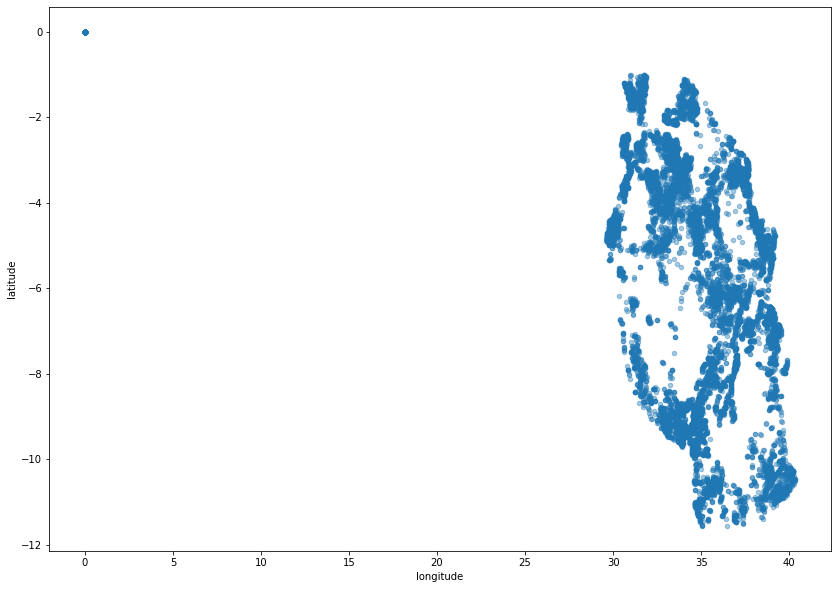

In [146]:
df.plot(kind='scatter', x="longitude", y="latitude", alpha=0.4, figsize=(14,10),sharex=False);

In [147]:
df.loc[df['longitude']==0]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_name,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
28,44718,0.0,2013-02-04,Dwsp,0,DWE,0.0,-2.000000e-08,Nkubanija,0,Lake Victoria,Nkonze,Shinyanga,17,1,Bariadi,Lugulu,0,True,NaN,False,2000,nira/tanira,wug,pay when scheme fails,salty abandoned,enough,shallow well,hand pump,0,DWE,Dwsp
55,15962,0.0,2011-08-01,Hesawa,0,HESAWA,0.0,-2.000000e-08,Bombani,0,Lake Victoria,Nyang'Hulukulu,Mwanza,19,6,Geita,Nyang'hwale,0,True,Borehole,True,2000,other,vwc,unknown,unknown,dry,machine dbh,other,0,HESAWA,Hesawa
68,45374,0.0,2013-02-16,Dwsp,0,DWE,0.0,-2.000000e-08,Maendeleo,0,Lake Victoria,Magua,Mwanza,17,1,Magu,Nkungulu,0,NaN,NaN,False,2000,nira/tanira,wug,unknown,soft,enough,shallow well,hand pump,0,DWE,Dwsp
139,68616,0.0,2011-07-19,Plan International,0,Plan Internationa,0.0,-2.000000e-08,Mwatulole,0,Lake Victoria,Ihayabuyaga,Mwanza,19,6,Geita,Kalangalala,0,True,Borehole,True,2000,india mark ii,vwc,never pay,soft,insufficient,machine dbh,hand pump,0,Others,Others
150,51539,0.0,2013-02-09,Dwsp,0,DWE,0.0,-2.000000e-08,Mwashidakwa,0,Lake Victoria,Magongolo,Shinyanga,17,1,Bariadi,Gamboshi,0,NaN,NaN,False,2000,nira/tanira,wug,unknown,soft,enough,shallow well,hand pump,0,DWE,Dwsp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14649,30454,0.0,2011-08-08,Nyamigogo,0,MASWI,0.0,-2.000000e-08,Husein,0,Lake Victoria,Nyaweshi,Mwanza,19,6,Geita,Kharumwa,0,True,Borehole,True,2000,india mark ii,vwc,never pay,soft,insufficient,shallow well,hand pump,0,Others,Others
14676,44766,0.0,2013-02-16,Dwsp,0,DWE,0.0,-2.000000e-08,Imalanota,0,Lake Victoria,Busumabwi,Mwanza,17,1,Magu,Nkungulu,0,False,NaN,False,2000,swn 80,wug,other,soft,enough,shallow well,hand pump,0,DWE,Dwsp
14766,56279,0.0,2012-11-04,Government Of Tanzania,0,RWE,0.0,-2.000000e-08,Ofisini,0,Lake Victoria,Madukani,Mwanza,19,2,Magu,Mkula,0,True,Kalemela Water Supply,True,2000,gravity,vwc,never pay,soft,insufficient,lake,communal standpipe multiple,0,RWE,Government Of Tanzania
14831,37994,0.0,2012-10-26,Hesawa,0,DWE,0.0,-2.000000e-08,Kwa Masilili,0,Lake Victoria,Solima A,Mwanza,19,2,Magu,Kabita,0,True,NaN,True,2000,nira/tanira,vwc,never pay,salty,enough,shallow well,hand pump,0,DWE,Hesawa


In [148]:
df.loc[df['longitude']!=0].describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14393.000000,14393.000000,14393.000000,14393.000000,14393.000000,14393.000000,14393.000000,14393.000000,14393.000000,14393.000000
mean,37162.759953,333.077239,675.949559,35.143114,-5.865223,0.428264,15.054957,5.727993,189.960120,1998.066352
std,21345.366618,2549.853999,692.064490,2.614986,2.804318,8.296237,17.454498,9.801944,475.729464,10.141322
min,10.000000,0.000000,-57.000000,29.612776,-11.564592,0.000000,1.000000,0.000000,0.000000,1960.000000
25%,18733.000000,0.000000,0.000000,33.242062,-8.569461,0.000000,5.000000,2.000000,0.000000,1995.000000
50%,37375.000000,0.000000,388.000000,35.011381,-5.180883,0.000000,12.000000,3.000000,30.000000,2000.000000
75%,55762.000000,30.000000,1320.000000,37.258894,-3.366969,0.000000,17.000000,5.000000,230.000000,2005.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-0.998752,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [149]:
df['longitude'].replace(to_replace = 0 , value =35.15, inplace=True) # changing 0 values to mean

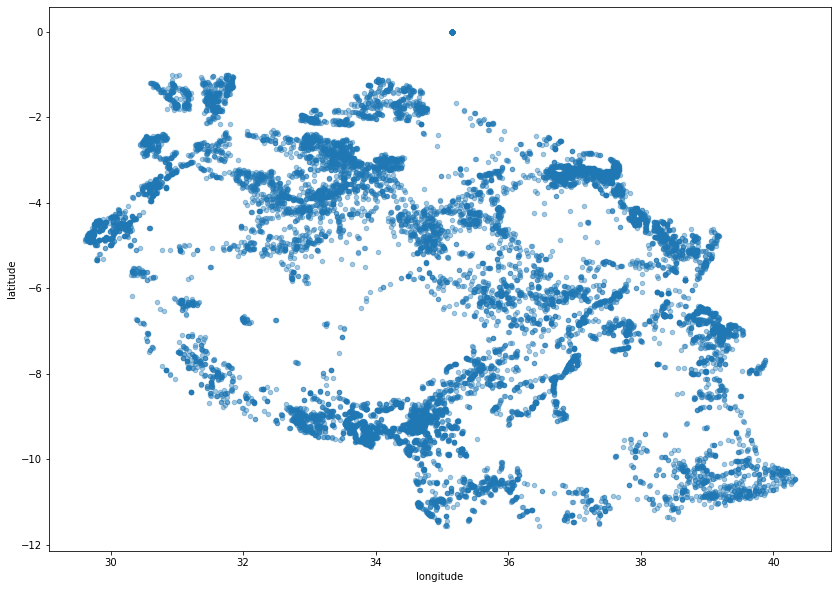

In [150]:
df.plot(kind='scatter', x="longitude", y="latitude", alpha=0.4, figsize=(14,10),sharex=False);

In [151]:
df['scheme_name'].value_counts()

K                           176
Borehole                    158
None                        150
DANIDA                      104
Chalinze wate                96
                           ... 
Mradi wa maji wa kalunde      1
Rwamgurusi water              1
Kwamba water supply           1
AIC                           1
Kumsasa spring source         1
Name: scheme_name, Length: 1789, dtype: int64

In [152]:
df['wpt_name'].value_counts()

none               877
Shuleni            435
Zahanati           204
Msikitini          112
Sokoni              68
                  ... 
Shechambo            1
Wazalendo            1
Nyakichuro           1
Kwa Dawi Welwel      1
Kwa Poneja           1
Name: wpt_name, Length: 10840, dtype: int64

In [153]:
df.id

0        50785
1        51630
2        17168
3        45559
4        49871
         ...  
14845    39307
14846    18990
14847    28749
14848    33492
14849    68707
Name: id, Length: 14850, dtype: int64

In [154]:
df.duplicated(subset='id', keep='first').sum()

0

In [155]:
# wpt_name, scheme_name and id column doesn't have any information about functionality.
# 'region' column gives more information about the region. So no need of'region_code' 
df.drop(columns=['wpt_name','scheme_name','id','region_code'],inplace=True )

In [156]:
df['region'].value_counts()

Shinyanga        1311
Iringa           1305
Mbeya            1119
Kilimanjaro      1115
Morogoro         1032
Kagera            858
Mwanza            795
Arusha            761
Kigoma            717
Pwani             696
Ruvuma            666
Tanga             639
Dodoma            578
Tabora            507
Mara              482
Singida           443
Rukwa             434
Mtwara            414
Manyara           389
Lindi             374
Dar es Salaam     215
Name: region, dtype: int64

In [158]:
#plt.figure(figsize=(26,12))
#ax = sns.countplot(x='region', hue="status_group", data=df)

In [160]:
#df_iringa =df.loc[df['region']=='Iringa'] #to see the Iringa area
#df_iringa.groupby(['water_quality','status_group']).count()

In [162]:
#df_daressalaam =df.loc[df['region']=='Dar es Salaam'] #to see the Dar es Salaam area
#df_daressalaam.groupby(['water_quality','status_group']).count()

In [163]:
df['amount_tsh'].value_counts()

0.0         10410
500.0         772
50.0          631
1000.0        370
20.0          349
            ...  
100000.0        1
60000.0         1
2550.0          1
3500.0          1
350.0           1
Name: amount_tsh, Length: 68, dtype: int64

In [165]:
#df.loc[df['amount_tsh']==0].groupby('status_group').count()

In [166]:
df['amount_tsh'].value_counts()/df['amount_tsh'].count()

0.0         0.701010
500.0       0.051987
50.0        0.042492
1000.0      0.024916
20.0        0.023502
              ...   
100000.0    0.000067
60000.0     0.000067
2550.0      0.000067
3500.0      0.000067
350.0       0.000067
Name: amount_tsh, Length: 68, dtype: float64

In [167]:
# 70% of this column hasn't informative value
df.drop(columns=['amount_tsh'],inplace=True )

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date_recorded          14850 non-null  object 
 1   funder                 14850 non-null  object 
 2   gps_height             14850 non-null  int64  
 3   installer              14850 non-null  object 
 4   longitude              14850 non-null  float64
 5   latitude               14850 non-null  float64
 6   num_private            14850 non-null  int64  
 7   basin                  14850 non-null  object 
 8   subvillage             14751 non-null  object 
 9   region                 14850 non-null  object 
 10  district_code          14850 non-null  int64  
 11  lga                    14850 non-null  object 
 12  ward                   14850 non-null  object 
 13  population             14850 non-null  int64  
 14  public_meeting         14029 non-null  object 
 15  pe

In [170]:
#df.groupby('status_group')[['gps_height']].mean()

In [171]:
df['gps_height'].value_counts()

 0       5211
-19        18
 1343      18
 1294      18
 1283      17
         ... 
 790        1
 766        1
 750        1
 734        1
 2023       1
Name: gps_height, Length: 2157, dtype: int64

In [172]:
df['gps_height'].value_counts()/df['gps_height'].count()

 0       0.350909
-19      0.001212
 1343    0.001212
 1294    0.001212
 1283    0.001145
           ...   
 790     0.000067
 766     0.000067
 750     0.000067
 734     0.000067
 2023    0.000067
Name: gps_height, Length: 2157, dtype: float64

<h4> 'gps_height' has somewht of informative information. No need to drop.

<h4> Population

In [173]:
df['population'].value_counts()

0       5453
1       1757
150      436
200      430
250      406
        ... 
2530       1
467        1
451        1
4521       1
1735       1
Name: population, Length: 637, dtype: int64

In [175]:
#df.loc[df['population']==0].groupby('status_group').count()

In [176]:
df.loc[df['population']!=0].describe()

,gps_height,longitude,latitude,num_private,district_code,population,construction_year
count,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000
mean,957.686815,36.095878,-6.145897,0.655954,6.304246,290.954134,1997.191338
std,614.671104,2.590755,2.732964,10.260354,11.423768,563.265359,12.282133
min,-57.000000,29.612776,-11.564592,0.000000,1.000000,1.000000,1960.000000
25%,337.000000,34.714606,-8.313329,0.000000,2.000000,40.000000,1988.000000
50%,1125.000000,36.748375,-5.859215,0.000000,3.000000,150.000000,2000.000000
75%,1449.000000,37.971678,-3.613975,0.000000,5.000000,350.000000,2008.000000
max,2777.000000,40.325016,-1.106080,669.000000,67.000000,11469.000000,2013.000000


In [177]:
# Replace 0 value with mean
df['population'].replace(to_replace = 0 , value =281, inplace=True)

In [179]:
#df.sort_values(by='population', ascending=False).head(50).groupby('status_group').count()

<h4> Most records in 'date_recorded' between 2011-2013. Not much affect  

In [180]:
df['date_recorded'].value_counts()

2013-02-03    138
2011-03-17    137
2011-03-16    137
2011-03-18    130
2011-03-14    129
             ... 
2004-01-09      1
2011-09-22      1
2011-09-02      1
2011-02-02      1
2011-09-07      1
Name: date_recorded, Length: 331, dtype: int64

In [181]:
df.drop(columns=['date_recorded'],inplace=True )

In [182]:
df['num_private'].value_counts()

0      14656
1         21
5         14
15        12
8         12
3         11
6         11
4         10
93         9
2          8
102        8
17         7
11         7
47         6
45         5
65         5
16         5
7          5
22         5
32         5
39         4
34         3
25         2
41         2
180        2
12         2
120        2
50         2
80         2
13         1
420        1
141        1
669        1
26         1
23         1
10         1
Name: num_private, dtype: int64

In [183]:
# Most were zero
df.drop(columns=['num_private'],inplace=True )

In [184]:
df['basin'].value_counts()

Lake Victoria              2623
Pangani                    2203
Rufiji                     2011
Internal                   1857
Lake Tanganyika            1620
Wami / Ruvu                1590
Lake Nyasa                 1247
Ruvuma / Southern Coast    1094
Lake Rukwa                  605
Name: basin, dtype: int64

In [185]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='basin', hue="status_group", data=df)

ValueError: Could not interpret input 'status_group'

<Figure size 1872x864 with 0 Axes>

In [186]:
df['subvillage'].nunique()

8443

In [187]:
# Due to high amount of ununique values
df.drop(columns=['subvillage'],inplace=True )

In [188]:
df['district_code'].value_counts()

1     3096
2     2756
3     2523
4     2254
5     1072
6     1034
7      823
30     261
8      239
33     189
53     176
43     148
13     105
63      69
23      67
62      18
60      13
0        4
67       2
80       1
Name: district_code, dtype: int64

In [189]:
df['public_meeting'].value_counts()

True     12738
False     1291
Name: public_meeting, dtype: int64

In [190]:
df['public_meeting'].fillna(value=True,inplace=True)

In [191]:
df['public_meeting'].value_counts()

True     13559
False     1291
Name: public_meeting, dtype: int64

In [192]:
df['permit'].value_counts()

True     9754
False    4359
Name: permit, dtype: int64

In [193]:
df['permit'].fillna(value=False, inplace=True)

In [194]:
df['permit'].value_counts()

True     9754
False    5096
Name: permit, dtype: int64

In [196]:
#target_status_group = {'functional':0, 
#                   'non functional': 2, 
#                   'functional needs repair': 1} 
#df['status_group'] = df['status_group'].replace(target_status_group)

In [257]:
df['status_group'].value_counts()

0    32259
2    22824
1     4317
Name: status_group, dtype: int64

In [197]:
df.to_csv('test_clean_data.csv')

In [198]:
df.groupby(['quantity','water_quality','status_group']).count().head(50)

KeyError: 'status_group'